# **Milestone 2**

## **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

## **Data Preparation**

### **Separating the target variable from other variables**

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')
### **Read the dataset**
hm=pd.read_csv("hmeq.csv")
# Copying data to another variable to avoid any changes to original data
data=hm.copy()
### **Print the first and last 5 rows of the dataset**
# Display first five rows
data.head()
# Display last 5 rows
data.tail()
### **Understand the shape of the dataset**
# Check the shape of the data
data.shape
### **Check the data types of the columns**
# Check info of the data
data.info()
### **Check for missing values**
# Analyse missing values - Hint: use isnull() function
data.isnull().sum()
# Check the percentage of missing values in the each column.
# Hint: divide the result from the previous code by the number of rows in the dataset
# Remove ___________ and complete the code

missing_percent = data.isnull().sum() * 100 / len(data)
missing_percent
### **Convert the data types**
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')
# Changing the data type of object type column to category. hint use astype() function
# remove ___________ and complete the code

for i in cols:
    data[i] = data[i].astype("category")

data.dtypes
# Checking the info again and the datatype of different variable
# remove ___________ and complete the code

data.info()
### **Analyze Summary Statistics of the dataset**
# Analyze the summary statistics for numerical variables
# Remove ___________ and complete the code

data.describe()
# Check summary for categorical data - Hint: inside describe function you can use the argument include=['category']
# Remove ___________ and complete the code

data.describe(include=['category']).T
# Checking the count of unique values in each categorical column 
# Remove ___________ and complete the code

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64

In [21]:
data.head()
df =data.copy()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [25]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262
3,1,1500,65019.0,89235.5,NaN,NaN,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262


In [31]:
# replacing nan values of Numerical features
df['LOAN'].fillna((df['LOAN'].median()), inplace=True)
df['MORTDUE'].fillna((df['MORTDUE'].median()), inplace=True)
df['VALUE'].fillna((df['VALUE'].median()), inplace=True)
df['YOJ'].fillna((df['YOJ'].median()), inplace=True)
df['DEROG'].fillna((df['DEROG'].median()), inplace=True)
df['DELINQ'].fillna((df['DELINQ'].median()), inplace=True)
df['CLAGE'].fillna((df['CLAGE'].median()), inplace=True)
df['NINQ'].fillna((df['NINQ'].median()), inplace=True)
df['CLNO'].fillna((df['CLNO'].median()), inplace=True)
df['DEBTINC'].fillna((df['DEBTINC'].median()), inplace=True)
# replacing nan values of Categorical features
df['BAD'].fillna((df['BAD'].mode()), inplace=True)
df['REASON'].fillna((df['REASON'].mode()[0]), inplace=True)
df['JOB'].fillna((df['JOB'].mode()[0]), inplace=True)

In [40]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
# Remove _________ and complete the code
X = df.drop(['BAD'], axis=1)

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
# Remove _________ and complete the code
X['REASON'] = pd.factorize(X['REASON'])[0]
X['JOB'] = pd.factorize(X['JOB'])[0]

# Create y(dependent varibale)
# Remove _________ and complete the code

y = df['BAD']

In [41]:
X.head(),y.head()

(   LOAN  MORTDUE     VALUE  REASON  JOB   YOJ  DEROG  DELINQ       CLAGE  \
 0  1100  25860.0   39025.0       0    0  10.5    0.0     0.0   94.366667   
 1  1300  70053.0   68400.0       0    0   7.0    0.0     2.0  121.833333   
 2  1500  13500.0   16700.0       0    0   4.0    0.0     0.0  149.466667   
 3  1500  65019.0   89235.5       1    0   7.0    0.0     0.0  173.466667   
 4  1700  97800.0  112000.0       0    1   3.0    0.0     0.0   93.333333   
 
    NINQ  CLNO    DEBTINC  
 0   1.0   9.0  34.818262  
 1   0.0  14.0  34.818262  
 2   1.0  10.0  34.818262  
 3   1.0  20.0  34.818262  
 4   0.0  14.0  34.818262  ,
 0    1
 1    1
 2    1
 3    1
 4    0
 Name: BAD, dtype: int64)

### **Splitting the data into 70% train and 30% test set**

In [43]:
# Split the data into training and test set
# Remove _________ and complete the code
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

### **Think about it** 
- You can try different splits like 70:30 or 80:20 as per your choice. Does this change in split affect the performance?
- If the data is imbalanced, can you make the split more balanced and if yes, how?

## **Model Evaluation Criterion**

#### After understanding the problem statement, think about which evaluation metrics to consider and why. 

In [45]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Build a Logistic Regression Model** 

In [46]:
# Defining the Logistic regression model
# Remove _________ and complete the code
logisticRegr = LogisticRegression()
# Fitting the model on the training data 
# Remove _________ and complete the code

logisticRegr.fit(X_train, y_train)

LogisticRegression()

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3327
           1       0.00      0.00      0.00       845

    accuracy                           0.80      4172
   macro avg       0.40      0.50      0.44      4172
weighted avg       0.64      0.80      0.71      4172



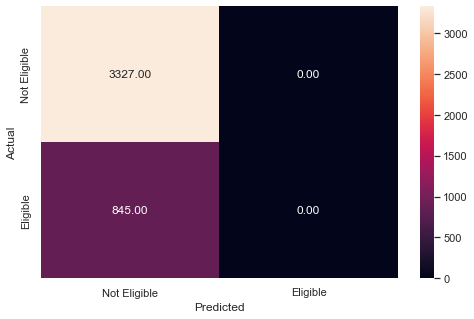

In [47]:
#Predict for train set
# Remove _________ and complete the code
predictions_train = logisticRegr.predict(X_train)

#checking the performance on the train dataset
# Remove _________ and complete the code
metrics_score(y_train,predictions_train)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1444
           1       0.00      0.00      0.00       344

    accuracy                           0.81      1788
   macro avg       0.40      0.50      0.45      1788
weighted avg       0.65      0.81      0.72      1788



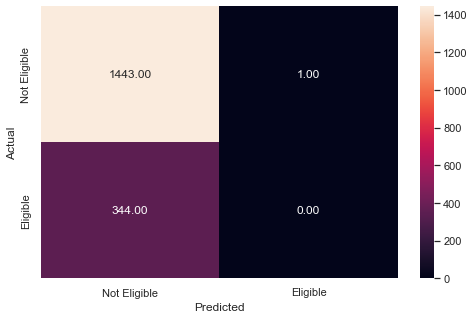

In [48]:
#Predict for test set
# Remove _________ and complete the code

predictions_test = logisticRegr.predict(X_test)

#checking the performance on the test dataset
# Remove _________ and complete the code
metrics_score(y_test,predictions_test)

**Observations: The model predicted 'Not Eligible" for almost every row of independent variables.**

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [53]:
# Printing the coefficients of logistic regression
# Remove _________ and complete the code

logisticRegr.coef_

array([[-1.83824449e-05, -3.29139880e-06,  2.21813640e-06,
        -1.17418015e-05, -2.02762945e-06, -2.41989828e-04,
         5.16105112e-05,  1.03386933e-04, -5.84108248e-03,
         6.26496167e-05, -2.09599559e-04, -2.21351939e-04]])

**Insights ________**

### **Think about it:**
- The above Logistic regression model was build on the threshold of 0.5, can we use different threshold?
- How to get an optimal threshold and which curve will help you achieve?
- How does, accuracy, precision and recall change on the threshold?

### **Build a Decision Tree Model**

### **Think about it:**
- In Logistic regression we treated the outliers and built the model, should we do the same for tree based models or not? If not, why?

#### Data Preparation for the tree based model

In [ ]:
# Add binary flags
# List of columns that has missing values in it
missing_col = [col for col in data.columns if data[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data,colmn)
    

In [ ]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = data.select_dtypes('number')

# Select string and object columns.
cat_data = data.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
# Remove _________ and complete the code
data[num_data.columns] = num_data._________________

# Fill object columns with model.
# Remove _________ and complete the code
for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].____________

#### Separating the target variable y and independent variable x

In [ ]:
# Drop dependent variable from dataframe and create the X(independent variable) matrix
# Remove _________ and complete the code

X = ____________________

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
# Remove _________ and complete the code
X = ______________________

# Create y(dependent varibale)
# Remove _________ and complete the code

y = ___________________________-

#### Split the data

In [ ]:
# Split the data into training and test set
# Remove _________ and complete the code


______________ 

In [ ]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
# Remove ___________ and complete the code

_______________

In [ ]:
#fitting Decision tree model
# Remove ___________ and complete the code
_______________

#### Checking the performance on the train dataset

In [ ]:
# Checking performance on the training data
# Remove ___________ and complete the code

_______________

#### Checking the performance on the test dataset

In [ ]:
# Checking performance on the testing data
# Remove _________ and complete the code

_______________

**Insights _____________**

### **Think about it:**
- Can we improve this model? 
- How to get optimal parameters in order to get the best possible results?

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


#### Using GridSearchCV for Hyperparameter tuning on the model

In [ ]:
# Choose the type of classifier. 
# Remove _________ and complete the code
________________


# Grid of parameters to choose from
# Remove _________ and complete the code
________________


# Type of scoring used to compare parameter combinations
# Remove _________ and complete the code
_________________


# Run the grid search
# Remove _________ and complete the code
_________________


# Fit the GridSearch on train dataset
# Remove _________ and complete the code
__________________


# Set the clf to the best combination of parameters
# Remove _________ and complete the code
_________________


# Fit the best algorithm to the data. 
# Remove _________ and complete the code
_________________

#### Checking the performance on the train dataset

In [ ]:
# Checking performance on the training data based on the tuned model
# Remove _________ and complete the code

______________

#### Checking the performance on the test dataset

In [ ]:
# Checking performance on the testing data based on the tuned model
# Remove _________ and complete the code

_________________


**Insights ___________**

#### Plotting the Decision Tree

In [ ]:
# Plot the decision  tree and analyze it to build the decision rule
# Remove _________ and complete the code


____________

#### Deduce the business rules apparent from the Decision Tree and write them down: _____

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [ ]:
# Defining Random forest CLassifier
# Remove _________ and complete the code

___________________

#### Checking the performance on the train dataset

In [ ]:
#Checking performance on the training data
# Remove _________ and complete the code
_______________

#### Checking the performance on the test dataset

In [ ]:
# Checking performance on the test data
# Remove _________ and complete the code

_______________

**Observations: __________**

### **Build a Random Forest model with Class Weights**

In [ ]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}

# Remove _________ and complete the code

_____________________________

# Fitting Random Forest model
# Remove _________ and complete the code

_______________

#### Checking the performance on the train dataset

In [ ]:
# Checking performance on the train data
# Remove _________ and complete the code

________________

#### Checking the performance on the test dataset

In [ ]:
# Checking performance on the test data
# Remove _________ and complete the code

________________

### **Think about it:**
- Can we try different weights?
- If yes, should we increase or decrease class weights for different classes? 

### **Tuning the Random Forest**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. 

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

You can learn more about Random Forest Hyperparameters from the link given below and try to tune them

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### **Warning:** This may take a long time depending on the parameters you tune. 

In [ ]:
# Choose the type of classifier. 
# Remove _________ and complete the code
________________


# Grid of parameters to choose from
# Remove _________ and complete the code
________________


# Type of scoring used to compare parameter combinations
# Remove _________ and complete the code
_________________


# Run the grid search
# Remove _________ and complete the code
_________________


#fit the GridSearch on train dataset
# Remove _________ and complete the code
__________________


# Set the clf to the best combination of parameters
# Remove _________ and complete the code
_________________


# Fit the best algorithm to the data. 
# Remove _________ and complete the code
_________________

#### Checking the performance on the train dataset

In [ ]:
# Checking performance on the training data
# Remove _________ and complete the code
______________

#### Checking the performance on the test dataset

In [ ]:
# Checking performace on test dataset
# Remove _________ and complete the code

_________________

**Insights: _____**

#### Plot the Feature importance of the tuned Random Forest

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset
# Remove _________ and complete the code

_________________

### **Think about it:**
- We have only built 3 models so far, Logistic Regression, Decision Tree and Random Forest 
- We can build other Machine Learning classification models like kNN, LDA, QDA or even Support Vector Machines (SVM).
- Can we also perform feature engineering and create model features and build a more robust and accurate model for this problem statement? 

### **Comparing Model Performances**

In [ ]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [ ]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [ ]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [ ]:
# Make the list of all the model names 

models = [___________________________]
# Remove _________ and complete the code

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [ ]:
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]
# Remove _________ and complete the code

comparison_frame = pd.DataFrame({'Model':[______________________], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

**Insights: ________**

**1. Refined insights -** What are the most meaningful insights from the data relevant to the problem?

**2. Comparison of various techniques and their relative performance -** How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**3. Proposal for the final solution design -** What model do you propose to be adopted? Why is this the best solution to adopt?